In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Centralized accuracy

In [30]:
centralized_acc = pd.read_csv("centralized_eval.csv")
centralized_acc = centralized_acc.rename(columns={'train_acc': 'train', 'test_acc': 'test'})
centralized_acc = centralized_acc[(centralized_acc['iteration'] % 100 == 0) | (centralized_acc['iteration'] == 1)]
centralized_acc = centralized_acc[centralized_acc['iteration'] <= 5000]
centralized_acc.head()

,iteration,train,test
0,1,34.0,58.0
99,100,82.0,46.0
199,200,74.0,26.0
299,300,80.0,26.0
399,400,86.0,34.0


In [31]:
centr_toplot = pd.melt(centralized_acc, id_vars=['iteration'], var_name='type', value_name='accuracy')
centr_toplot.head()

,iteration,type,accuracy
0,1,train,34.0
1,100,train,82.0
2,200,train,74.0
3,300,train,80.0
4,400,train,86.0


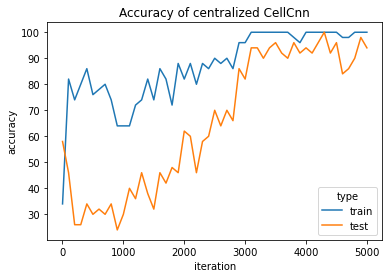

In [33]:
plot = sns.lineplot(data=centr_toplot, x="iteration", y="accuracy", hue="type")
plot.set_title("Accuracy of centralized CellCnn")
plot.figure.savefig("figs/centralized_accuracy.png")

## Distributed

In [26]:
df = pd.read_csv("accuracy_eval.csv")
df = df[['hosts', 'n_local_iter', 'epochs', 'accuracy', 'precision', 'recall', 'fscore']]
df

,hosts,n_local_iter,epochs,accuracy,precision,recall,fscore
0,5,1,100,98.4,97.23,99.60,98.40
1,5,1,150,97.8,96.09,99.60,97.81
2,5,1,200,97.0,94.62,99.60,97.04
3,5,1,250,96.6,93.89,99.60,96.66
4,5,1,300,96.8,94.25,99.60,96.85
5,5,5,100,69.0,96.94,38.46,55.07
6,5,5,150,79.4,100.00,58.30,73.66
7,5,5,200,81.4,100.00,62.35,76.81
8,5,5,250,90.4,98.07,82.19,89.43
9,5,5,300,97.8,96.09,99.60,97.81


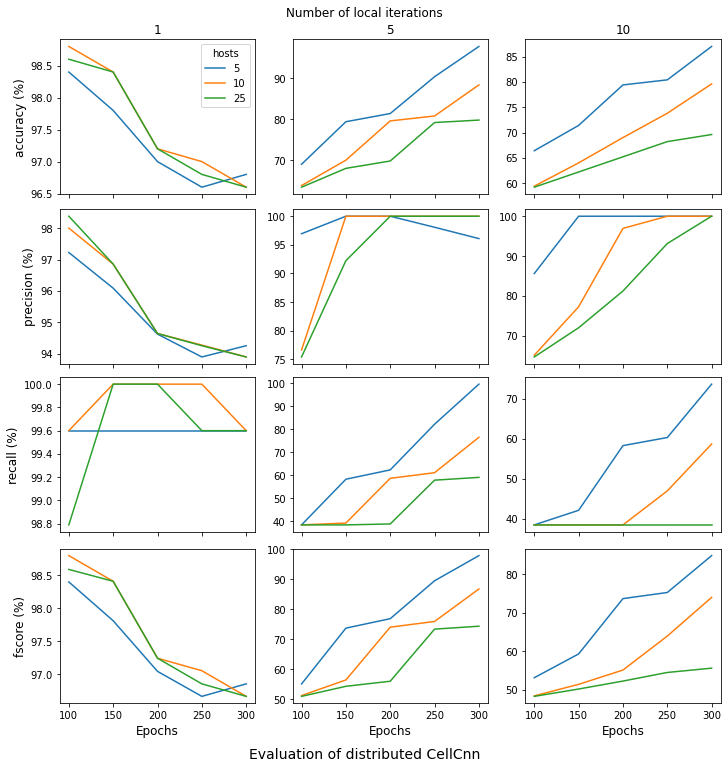

In [28]:
local_iter_range = [1, 5, 10]
values = ['accuracy', 'precision', 'recall', 'fscore']
hosts = [5, 10, 25]
epochs=[100, 150, 200, 250, 300]

n_val = len(values)
n_iter = len(local_iter_range)

fig, ax = plt.subplots(n_val, n_iter, sharex=True, constrained_layout=True, figsize=(10, 10))

for i in range(n_val):
    for j in range(n_iter):
        for k in range(len(hosts)):
            val = values[i]
            y = df[(df['n_local_iter'] == local_iter_range[j]) & (df['hosts'] == hosts[k])][val]
            ax[i, j].plot(epochs, y)
            if i == 0:
                ax[i, j].set_title(local_iter_range[j])
            if i == n_val-1:
                ax[i, j].set_xlabel("Epochs", fontsize=12)
            if j == 0:
                ax[i, j].set_ylabel(val + " (%)", fontsize=12)
            
#fig.text(-0.01, 0.5, 'Number of local iterations', ha='center', va='center', rotation='vertical', fontsize=12)
fig.text(0.5, 1.01, 'Number of local iterations', ha='center', va='center', fontsize=12)

ax[0, 0].legend(('5', '10', '25'), title='hosts', loc="upper right")
fig.text(0.5, -0.02, 'Evaluation of distributed CellCnn', ha='center', va='center', fontsize=14)

plt.savefig("figs/distributed.png")

In [21]:
time = pd.read_csv("time-data.csv")
time = time[["hosts", "DecentralizedCNN(SIMULATION)", "CnnProtocolSimul(PRE-COMPUTATION)", "LocalIteration", "UpdateWeights", "Combine"]]
time = time.rename(columns={"DecentralizedCNN(SIMULATION)": "Simulation", "CnnProtocolSimul(PRE-COMPUTATION)": "Pre-Computation"})
time

,hosts,Simulation,Pre-Computation,LocalIteration,UpdateWeights,Combine
0,1,82.281094,3.590149,73.676978,0.029252,0.001024
1,2,46.453484,4.423876,29.573963,0.027924,5.294178
2,3,41.854156,3.915742,25.829086,0.009044,6.962882
3,5,35.868406,3.962878,16.201750,0.006306,10.884786
4,7,30.834408,3.510688,12.029168,0.004960,10.717266
5,9,32.978258,3.958893,8.959799,0.003448,15.365036
6,10,31.883051,3.828286,8.211820,0.003092,15.281245
7,15,28.975314,3.868113,5.463018,0.002154,14.915423
8,20,31.230756,3.901933,4.227010,0.001713,18.654167
9,25,30.538254,4.003626,3.254220,0.001228,18.691940


In [22]:
full_time = pd.read_csv("time-data.csv")
full_time = full_time[["hosts", "depth", "DecentralizedCNN(SIMULATION)", "CnnProtocolSimul(PRE-COMPUTATION)", "LocalIteration", "UpdateWeights", "Combine"]]
full_time = full_time.rename(columns={"DecentralizedCNN(SIMULATION)": "Simulation", "CnnProtocolSimul(PRE-COMPUTATION)": "Pre-Computation"})
full_time

,hosts,depth,Simulation,Pre-Computation,LocalIteration,UpdateWeights,Combine
0,1,1,82.281094,3.590149,73.676978,0.029252,0.001024
1,2,1,46.453484,4.423876,29.573963,0.027924,5.294178
2,3,1,41.854156,3.915742,25.829086,0.009044,6.962882
3,5,2,35.868406,3.962878,16.201750,0.006306,10.884786
4,7,2,30.834408,3.510688,12.029168,0.004960,10.717266
5,9,3,32.978258,3.958893,8.959799,0.003448,15.365036
6,10,3,31.883051,3.828286,8.211820,0.003092,15.281245
7,15,3,28.975314,3.868113,5.463018,0.002154,14.915423
8,20,4,31.230756,3.901933,4.227010,0.001713,18.654167
9,25,4,30.538254,4.003626,3.254220,0.001228,18.691940


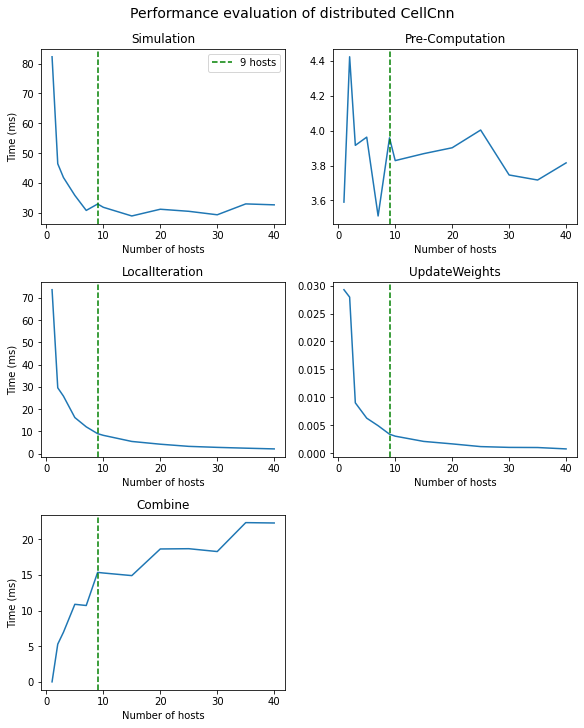

In [25]:
import matplotlib.lines as mlines

fig, ax = plt.subplots(3, 2, sharey=False, constrained_layout=True, figsize=(8, 10))

ax[0, 0].plot(time["hosts"], time["Simulation"])
ax[0, 0].set_title("Simulation", fontsize=12)
ax[0, 0].set_xlabel("Number of hosts", fontsize=10)
ax[0, 0].set_ylabel("Time (ms)", fontsize=10)
ax[0, 0].axvline(x=9, color='g', linestyle='--')
green_line = mlines.Line2D([], [], color='g', linestyle='--', label='9 hosts')
ax[0, 0].legend(handles=[green_line], loc="upper right",  fontsize=10)


ax[0, 1].plot(time["hosts"], time["Pre-Computation"])
ax[0, 1].set_title("Pre-Computation", fontsize=12)
ax[0, 1].set_xlabel("Number of hosts", fontsize=10)
ax[0, 1].axvline(x=9, color='g', linestyle='--')

ax[1, 0].plot(time["hosts"], time["LocalIteration"])
ax[1, 0].set_title("LocalIteration", fontsize=12)
ax[1, 0].set_xlabel("Number of hosts", fontsize=10)
ax[1, 0].set_ylabel("Time (ms)", fontsize=10)
ax[1, 0].axvline(x=9, color='g', linestyle='--')

ax[1, 1].plot(time["hosts"], time["UpdateWeights"])
ax[1, 1].set_title("UpdateWeights", fontsize=12)
ax[1, 1].set_xlabel("Number of hosts", fontsize=10)
ax[1, 1].axvline(x=9, color='g', linestyle='--')

ax[2, 0].plot(time["hosts"], time["Combine"])
ax[2, 0].set_title("Combine", fontsize=12)
ax[2, 0].set_xlabel("Number of hosts", fontsize=10)
ax[2, 0].set_ylabel("Time (ms)", fontsize=10)
ax[2, 0].axvline(x=9, color='g', linestyle='--')

ax[2, 1].axis('off')

green_line = mlines.Line2D([], [], color='g', linestyle='--', label='9 hosts')
plt.suptitle("Performance evaluation of distributed CellCnn", fontsize=14)
plt.savefig("figs/time.png")
plt.show()

In [35]:
df = pd.read_csv("split_accuracy_eval.csv")
df = df[['hosts', 'n_local_iter', 'epochs', 'accuracy', 'precision', 'recall', 'fscore']]
df

,hosts,n_local_iter,epochs,accuracy,precision,recall,fscore
0,5,1,50,80.20,100.00,60.4,75.31
1,5,1,100,97.85,95.97,99.9,97.89
2,5,1,150,97.85,95.97,99.9,97.89
3,5,1,200,97.40,95.14,99.9,97.46
4,5,1,250,97.00,94.51,99.8,97.08
5,5,1,300,96.75,94.06,99.8,96.85
6,5,5,50,67.00,86.96,40.0,54.79
7,5,5,100,79.10,100.00,58.2,73.58
8,5,5,150,80.50,100.00,61.0,75.78
9,5,5,200,89.75,100.00,79.5,88.58


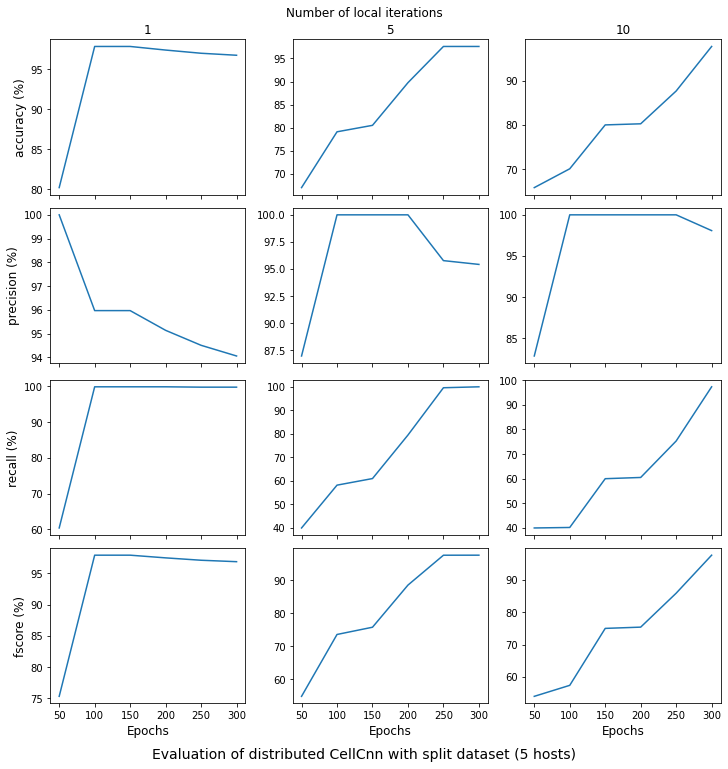

In [36]:
local_iter_range = [1, 5, 10]
values = ['accuracy', 'precision', 'recall', 'fscore']
epochs=[50, 100, 150, 200, 250, 300]

n_val = len(values)
n_iter = len(local_iter_range)

fig, ax = plt.subplots(n_val, n_iter, sharex=True, constrained_layout=True, figsize=(10, 10))

for i in range(n_val):
    for j in range(n_iter):
            val = values[i]
            y = df[df['n_local_iter'] == local_iter_range[j]][val]
            ax[i, j].plot(epochs, y)
            if i == 0:
                ax[i, j].set_title(local_iter_range[j])
            if i == n_val-1:
                ax[i, j].set_xlabel("Epochs", fontsize=12)
            if j == 0:
                ax[i, j].set_ylabel(val + " (%)", fontsize=12)
            
fig.text(0.5, 1.01, 'Number of local iterations', ha='center', va='center', fontsize=12)
fig.text(0.5, -0.02, 'Evaluation of distributed CellCnn with split dataset (5 hosts)', ha='center', va='center', fontsize=14)


plt.savefig("figs/split.png")